In [17]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
path = os.path.join("segmentation_results")

In [19]:
# Load the segmentation results from CSV files
dbscan_results_age_family_size = pd.read_csv(os.path.join("segmentation_results",'dbscan_segmentation_results_age_family_size.csv'))
dbscan_results_age_ever_married = pd.read_csv(os.path.join("segmentation_results",'dbscan_segmentation_results_age_ever_married.csv'))
hac_results_age_family_size = pd.read_csv(os.path.join("segmentation_results",'hac_segmentation_results_age_family_size.csv'))
hac_results_age_ever_married = pd.read_csv(os.path.join("segmentation_results",'hac_segmentation_results_age_ever_married.csv'))
kmeans_results_age_family_size = pd.read_csv(os.path.join("segmentation_results",'kmeans_segmentation_results_age_family_size.csv'))
kmeans_results_age_ever_married = pd.read_csv(os.path.join("segmentation_results",'kmeans_segmentation_results_age_ever_married.csv'))

In [20]:
# Merge the results into a single DataFrame
merged_df = dbscan_results_age_family_size.copy()
merged_df['Cluster_DBSCAN_Age_Family_Size'] = dbscan_results_age_family_size['Cluster']
merged_df['Cluster_DBSCAN_Age_Ever_Married'] = dbscan_results_age_ever_married['Cluster']
merged_df['Cluster_HAC_Age_Family_Size'] = hac_results_age_family_size['Cluster']
merged_df['Cluster_HAC_Age_Ever_Married'] = hac_results_age_ever_married['Cluster']
merged_df['Cluster_KMeans_Age_Family_Size'] = kmeans_results_age_family_size['Cluster']
merged_df['Cluster_KMeans_Age_Ever_Married'] = kmeans_results_age_ever_married['Cluster']

# Ensure 'Ever_Married' column is included
merged_df['Ever_Married'] = dbscan_results_age_ever_married['Ever_Married']

In [21]:
def create_coassociation_matrix(labels_list):
    n_samples = len(labels_list[0])
    coassoc_matrix = np.zeros((n_samples, n_samples))
    
    for labels in labels_list:
        for i in range(n_samples):
            for j in range(n_samples):
                if labels[i] == labels[j]:
                    coassoc_matrix[i, j] += 1
    return coassoc_matrix / len(labels_list)

labels_list = [
    merged_df['Cluster_DBSCAN_Age_Family_Size'],
    merged_df['Cluster_DBSCAN_Age_Ever_Married'],
    merged_df['Cluster_HAC_Age_Family_Size'],
    merged_df['Cluster_HAC_Age_Ever_Married'],
    merged_df['Cluster_KMeans_Age_Family_Size'],
    merged_df['Cluster_KMeans_Age_Ever_Married']
]

coassoc_matrix = create_coassociation_matrix(labels_list)

In [22]:
# Apply K-means to the co-association matrix for consensus clustering
consensus_clustering = KMeans(n_clusters=4, random_state=42)
consensus_labels = consensus_clustering.fit_predict(coassoc_matrix)

# Add consensus labels to the DataFrame
merged_df['Consensus_Cluster'] = consensus_labels

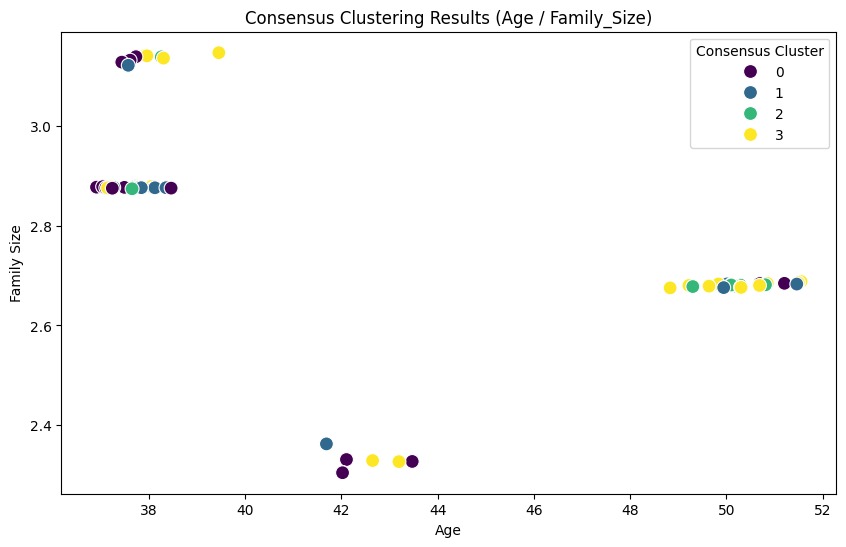

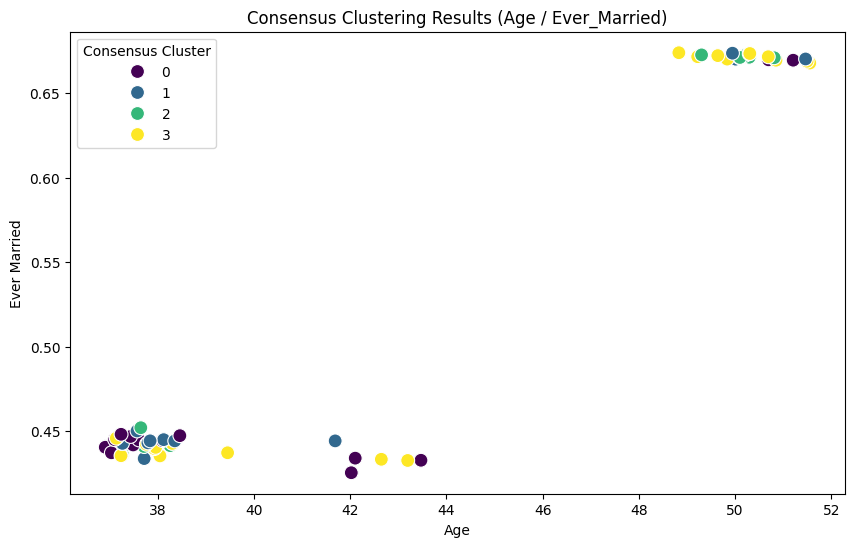

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Age'], y=merged_df['Family_Size'], hue=merged_df['Consensus_Cluster'], palette='viridis', s=100)
plt.title('Consensus Clustering Results (Age / Family_Size)')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend(title='Consensus Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Age'], y=merged_df['Ever_Married'], hue=merged_df['Consensus_Cluster'], palette='viridis', s=100)
plt.title('Consensus Clustering Results (Age / Ever_Married)')
plt.xlabel('Age')
plt.ylabel('Ever Married')
plt.legend(title='Consensus Cluster')
plt.show()